# Signal files
First let's look at the available signal files

You can to this by running the command in the terminal:

`eosls /store/user/cmsdas/2025/short_exercises/tagging/` # for EAF

`xrdfs root://cmseos.fnal.gov ls /store/user/cmsdas/2025/short_exercises/tagging/` # for SWAN


You will find the following signal files:
- BulkGravToZZ_tree.root
- BulkGravTohh_tree.root
- ZprimeToTT_tree.root
- ZprimeToWW_tree.root

And QCD bacqground: 
- qcd-pythia_tree_SLIM.root


# Let's start the exercise!
Open the file with `uproot` and convert the tree to a `pandas` dataframe.

We will start using the `BulkGravTohh` signal file but you can repeat the exercise with a different signal later.

In [1]:
import uproot

filename_hh = 'root://cmseos.fnal.gov//store/user/cmsdas/2024/short_exercises/tagging/BulkGravTohh_tree.root'
filename_qcd = 'root://cmseos.fnal.gov//store/user/cmsdas/2024/short_exercises/tagging/qcd-pythia_tree_SLIM.root'

uptree_hh = uproot.open(filename_hh)["Friends"]
uptree_qcd = uproot.open(filename_qcd)["Friends"]

branches = ['ak8_nn_HbbvsQCD',            # tagger DeepAK8
            'ak8_decorr_nn_ZHbbvsQCD',    # tagger DeepAK8-MD
            'ak8_doubleb',                # tagger
            'ak8_tau21',                  # tagger
            'ak8_ecfN2',                  # tagger
            'ak8_bestH',                  # tagger
            'ak8_sdmass',                 # tagger
            'ak8_pt',
            'ak8_eta',
            'gen_pt',
            'gen_eta']


print("get hh")
df_hh = uptree_hh.arrays(branches+['rewgt'], library="pd")
# print(df_hh)

print("get QCD")
df_qcd = uptree_qcd.arrays(branches+['genweight'], library="pd")
# print(df_qcd)

get hh
get QCD


# Apply basic selections

In [2]:
import pandas
import numpy as np

# mask higgs outside of fiducial cuts
mask_hh = (df_hh['gen_pt'] > 1000) & (df_hh['gen_pt'] < 1500) & (np.abs(df_hh['gen_eta']) < 2.4) & (df_hh['ak8_sdmass'] > 40) & (df_hh['ak8_sdmass'] < 200)
df_hh = df_hh[mask_hh]
df_hh['sample_weight'] = df_hh['rewgt']
df_hh['label'] = np.ones((len(df_hh)),dtype=int)

# mask qcd outside of fiducial cuts
mask_qcd = (df_qcd['gen_pt'] > 1000) & (df_qcd['gen_pt'] < 1500) & (np.abs(df_qcd['gen_eta']) < 2.4) & (df_qcd['ak8_sdmass'] > 40) & (df_qcd['ak8_sdmass'] < 200)
df_qcd = df_qcd[mask_qcd]
df_qcd['sample_weight'] = df_qcd['genweight']
df_qcd['label'] = np.zeros((len(df_qcd)),dtype=int)

# Let's plot the taggers for QCD and signal

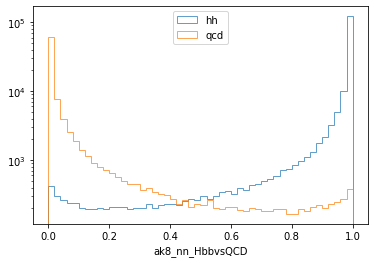

In [3]:
import matplotlib.pyplot as plt

plt.hist(df_hh['ak8_nn_HbbvsQCD'], bins=50, alpha=0.7, label='hh', histtype='step')
plt.hist(df_qcd['ak8_nn_HbbvsQCD'], bins=50, alpha=0.7, label='qcd', histtype='step')
plt.xlabel('ak8_nn_HbbvsQCD')
plt.yscale('log')
plt.legend()
plt.show()


# Concatenate signal and background
This is needed in the following

In [4]:
df = pandas.concat([df_hh,df_qcd])

df

,ak8_nn_HbbvsQCD,ak8_decorr_nn_ZHbbvsQCD,ak8_doubleb,ak8_tau21,ak8_ecfN2,ak8_bestH,ak8_sdmass,ak8_pt,ak8_eta,gen_pt,gen_eta,rewgt,sample_weight,label,genweight
71,0.997910,0.966018,0.639648,0.312356,0.237549,0.968759,114.324455,943.5,0.473999,1036.0,0.459961,0.003346,3.346120e-03,1,NaN
155,0.991485,0.984800,0.410645,0.629371,0.277100,0.045536,70.636497,1224.0,-0.284180,1416.0,-0.282227,0.000380,3.804002e-04,1,NaN
276,0.998709,0.902522,-0.010880,0.182233,0.177124,0.312264,139.366959,1187.0,0.049248,1120.0,0.045898,0.001986,1.986259e-03,1,NaN
843,0.998738,0.956193,0.919434,0.292515,0.231079,0.981281,122.679993,957.5,0.962158,1022.0,0.958984,0.003346,3.346120e-03,1,NaN
1680,0.997370,0.995647,0.356201,0.584867,0.327881,0.163290,71.869606,1044.0,0.221252,1132.0,0.230469,0.001986,1.986259e-03,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1612709,0.032039,0.013714,-0.808594,0.367254,0.233032,0.010093,148.619888,881.0,-0.100525,1232.0,-0.031982,NaN,3.253174e-12,0,3.253174e-12
1612719,0.000976,0.044383,-0.832031,0.362534,0.254883,0.018189,165.783401,1306.0,0.486206,1104.0,0.117920,NaN,6.240069e-12,0,6.240069e-12
1612754,0.027902,0.048464,-0.942871,0.538784,0.324951,0.006457,152.791931,909.5,0.846069,1304.0,1.121094,NaN,2.333564e-12,0,2.333564e-12
1612803,0.001519,0.000999,-0.928711,0.628799,0.363770,0.016806,77.016121,1299.0,0.860229,1348.0,0.851562,NaN,1.905873e-12,0,1.905873e-12


# Tagger performance

Plot the ROC and calculate the area under it for one of the tagging variables. We'll plot the true-positive rate (TPR) vs. the false-positive rate (FPR).

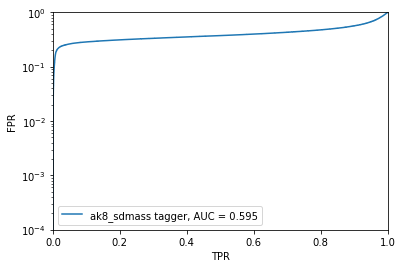

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
%matplotlib inline
fpr = {}
tpr = {}
threshold = {}
plt.figure()

tagger = 'ak8_sdmass'
fpr[tagger], tpr[tagger], threshold[tagger] = roc_curve(df['label'], df[tagger], sample_weight=df['sample_weight'])
myauc = auc(fpr[tagger], tpr[tagger]) #,reorder=True)
plt.plot(tpr[tagger],fpr[tagger],label='%s tagger, AUC = %.3f'%(tagger, myauc))

plt.legend(loc='best')
plt.semilogy()
plt.xlim([0, 1])
plt.ylim([1e-4, 1])
plt.xlabel("TPR");
plt.ylabel("FPR");

# Train your own tagger

In [6]:
import keras
from keras.models import Model
from keras.layers import Input, Activation, Dense
import numpy as np

inputs = Input(shape=(2,), name = 'input')  
x = Dense(5, name = 'dense_1', activation = 'relu')(inputs)
outputs = Dense(1, name = 'output', activation='sigmoid')(x)

# create the model
model = Model(inputs=inputs, outputs=outputs)
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# print the model summary
model.summary()


### IGNORE THE RED WARNINGS!!!!

2025-01-03 22:18:19.497670: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-03 22:18:22.756110: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21 (84.00 B)

 Trainable params: 21 (84.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
x = np.vstack([df['ak8_sdmass'], df['ak8_tau21']]).T
print(x.shape)
y = df['label']
print(y.shape)
model.fit(x,y, epochs=1)
df['ak8_sdmass_tau21'] = model.predict(x)

(254175, 2)
(254175,)
7943/7943 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.7220 - loss: 1.6510
7943/7943 ━━━━━━━━━━━━━━━━━━━━ 6s 808us/step


In [ ]:
# now plot the ROC curve and calculate the AUC for this new ak8_sdmass_tau21 tagger

# Exercises

- Exercise 1: Plot all of the taggers on the same ROC curve
- Exercise 2 [done above, feel free to improve/play around]: Train your own custom "traditional" tagger based on mSD and tau21
- Exercise 3: Add your tagger to the ROC curve
- Exercise 4: Repeat with a different signal sample (W, Z, or top)
- Exercise 5 [advanced]: Understand the impact of different sets of inputs in the jet classification problem
- Exercise 6 [extra]: Look at the 'ak8_sdmass' distribution of signal and background after applying different cuts on the other taggers. Thoughts, ideas, concerns ?